<a href="https://colab.research.google.com/github/seungha-jeon/colab/blob/main/2%EC%A1%B0_DX%EA%B3%BC%EC%A0%9C_%EC%83%88%EC%B6%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from scipy import signal
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D
from keras.utils import np_utils
%config InlineBackend.figure_format = 'retina'

In [2]:
#from zipfile import ZipFile
#from pathlib import Path

In [3]:
#다운 받을 폴더 생성
import os.path

nowfolder = os.getcwd() #현재 폴더 위치 확인
newfolder = 'DXmotor' #신규 폴더 생성
upfolder = os.path.abspath(os.path.join(nowfolder, os.pardir)) #현재 폴더에서 최상위 폴더로 이동
os.chdir(upfolder) #최상위 폴더를 현재 위치로 변경

if not os.path.exists(newfolder): #현재 폴더에 신규 폴더 이름이 없는지 확인
    os.makedirs(newfolder)        #신규 폴더 생성
    
os.chdir('/'+ newfolder)          #신규 폴더로 현재 위치로 변경
folder = os.getcwd()              #신규 폴더를 변수 지정

In [4]:
#깃허브에서 파일 다운 받아 압축 풀기 
#from urllib.parse import urlparse
import urllib.request
urls = "https://github.com/navy510616/DX-Motor/raw/master/Motordata.zip" #깃허브 파일 주소
urllib.request.urlretrieve(urls, r'down.zip')                            #down.zip이라는 이름으로 파일 다운

('down.zip', <http.client.HTTPMessage at 0x7fc543f8f190>)

In [5]:
#다운받은 파일 압축 풀기
!unzip down.zip #zip 파일 압축 풀기

Archive:  down.zip
  inflating: barcode_Wave2_Ch2_Mic22020y09m24d_09h59m21s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y09m24d_09h59m49s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y09m24d_10h00m01s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y09m24d_10h00m13s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h11m37s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h11m50s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h12m03s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h12m37s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h12m49s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h13m02s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h13m51s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h14m03s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h14m16s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h14m48s.tdms  
  inflating: barcode_Wave2_Ch2_Mic22020y10m08d_12h15m01s.tdms  
  inflating: barcode_

In [6]:
pip install nptdms   # 한번만 설치

     |████████████████████████████████| 174kB 4.2MB/s 
  Created wheel for nptdms: filename=npTDMS-1.3.0-py2.py3-none-any.whl size=99052 sha256=ddc7c128a36b0b28b3fe411fdc83c805065ce66c5d84cfcd2402c083bd3dfd7c
  Stored in directory: /root/.cache/pip/wheels/59/e7/00/43c6057d60167697a2c7d455f1d58f9f43972e6d1a298860c5
Successfully built nptdms


In [7]:
from nptdms import TdmsFile as td
from nptdms import tdms

folder_path = folder                                                     # 폴더 주소 받기
file_list = os.listdir(folder_path)                                      # 폴더 내에 파일 전체 리스트 받기
file_list_tdms = [file for file in file_list if file.endswith('.tdms')]  # 폴더 내에 Tdms 파일만 리스트 만들기
df = pd.DataFrame()                                                      # 빈 DataFrame 만들기 

for i in range(len(file_list_tdms)):                                     # 폴더 내에 파일 for 문
  file_path = folder_path + '/' + file_list_tdms[i]                      # 폴더 내 파일 주소 
  tdms_file = td.read(file_path)                                         # tdms 파일을 변환


  for group in tdms_file.groups():                                       # tdms 파일내에 data 값 가지고 오기
#    group_name = group.name                                             # (정보 가져오기)
    for channel in group.channels():
#        channel_name = channel.name                                     # (정보 가져오기)
#        properties = channel.properties                                 # (정보 가져오기)
        data = pd.DataFrame(channel[:6500])                              # 합/불 진동 데이터로 사용하는 주파수가 0 ~ 6500Hz임 (이후 데이터 삭제)
        data.columns = [ i+1 ]                                           # 컬럼명 변경
  
  df = pd.concat([df, data], axis=1)                                     # 각각의 데이터를 열 추가  
  i = i + 1

df = df.copy()                                                           #사본 저장
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.724506,0.022422,0.186963,0.033322,0.020658,0.120132,0.062419,0.180375,0.057626,0.007727,-0.056340,-0.004164,-0.023657,-0.011499,0.007928,-0.041174,0.003893,-0.023910,-0.022958,0.001635,0.093390,-0.008934,0.081171,0.032617,-0.038856,0.051321,-0.056157,-0.004634,-0.056910,-0.025470,0.000753,-0.178527,-0.100562,-0.052640,-0.024404,0.045955,-0.134850,0.103374,-0.045492,-0.047281,...,-1.151513,-0.007367,-0.227207,0.083345,0.008735,0.033683,0.040223,-0.025066,-1.516498,-0.938089,-0.080220,-0.011199,-1.038127,0.040090,-0.550268,-0.050996,-0.096575,-0.130906,-0.078161,-0.517708,0.062672,-0.066809,0.020754,0.044384,0.027601,-0.080611,0.023627,-0.016039,-1.088020,-0.076444,0.110871,0.092643,-0.027999,-0.004983,0.026583,-0.096497,-0.171945,0.032846,-0.099731,-0.052267
1,-0.706575,0.040831,0.188023,0.057692,0.016430,0.134097,0.047208,0.134163,0.048412,0.012949,-0.055748,-0.015515,-0.031798,-0.029396,0.013299,-0.033599,0.005983,-0.027698,-0.051779,-0.019339,0.068742,-0.034201,0.070446,0.028691,-0.009945,0.039048,-0.047473,-0.019333,-0.054302,-0.005339,-0.002767,-0.169741,-0.080804,-0.031142,-0.013655,0.038964,-0.130081,0.103597,-0.014660,-0.046263,...,-1.155778,0.001223,-0.253896,0.087813,0.010842,0.051333,0.032009,0.007235,-1.514710,-0.965915,-0.060372,-0.019459,-1.033539,0.027691,-0.552465,-0.038356,-0.075150,-0.123686,-0.024362,-0.496171,0.071878,-0.064292,-0.018057,0.036393,0.029426,-0.097683,-0.005471,-0.002484,-1.087636,-0.045378,0.096190,0.095569,-0.022344,-0.000238,0.043185,-0.108595,-0.209599,0.040241,-0.113653,-0.014889
2,-0.698912,0.046805,0.168307,0.089560,0.028197,0.158383,0.013143,0.074071,0.048316,0.015310,-0.063600,-0.028914,-0.038326,-0.054115,0.017803,-0.039368,0.008078,-0.031124,-0.074439,-0.031401,0.047039,-0.042012,0.054597,0.031148,0.007151,0.001532,-0.045131,-0.032256,-0.039109,0.021350,-0.001455,-0.171264,-0.065840,-0.006200,-0.010397,0.036465,-0.121843,0.077396,0.031009,-0.032593,...,-1.153581,0.003279,-0.275954,0.067466,0.010577,0.050430,0.025391,0.029654,-1.515399,-1.000142,-0.053820,-0.019752,-1.033728,0.012414,-0.552770,-0.020863,-0.058210,-0.151904,0.034333,-0.482883,0.074959,-0.054085,-0.026192,0.033382,0.042150,-0.104067,-0.028252,0.023849,-1.092578,-0.042066,0.071512,0.095581,-0.021116,-0.008193,0.070603,-0.097364,-0.266518,0.034701,-0.117218,0.005591
3,-0.702195,0.040114,0.148429,0.110853,0.046419,0.166471,-0.019791,0.036327,0.046564,0.019129,-0.064680,-0.044866,-0.052490,-0.077438,0.023813,-0.033744,0.025578,-0.043975,-0.076884,-0.053405,0.040458,-0.058806,0.030654,0.024867,0.017713,-0.048172,-0.030534,-0.034876,-0.009686,0.041481,-0.005238,-0.197212,-0.035538,0.007488,-0.010216,0.018990,-0.124661,0.039867,0.056150,-0.023139,...,-1.152825,0.003419,-0.282897,0.049900,0.005471,0.019526,0.036260,0.037471,-1.514063,-1.025266,-0.055579,-0.023468,-1.030671,-0.000918,-0.554875,-0.004128,-0.024085,-0.176353,0.080141,-0.485275,0.069822,-0.009518,-0.067827,0.037127,0.049707,-0.099345,-0.054374,0.047118,-1.102101,-0.057102,0.046172,0.104193,-0.008109,-0.010457,0.076203,-0.066858,-0.327302,0.008205,-0.095787,0.008325
4,-0.710333,0.027511,0.146875,0.127684,0.064039,0.158052,-0.036658,0.018755,0.045630,0.022955,-0.071354,-0.066117,-0.056289,-0.084496,0.028456,-0.019098,0.051646,-0.051303,-0.077619,-0.060517,0.029215,-0.083628,0.005212,0.019315,0.001267,-0.105620,-0.028209,-0.030733,0.028354,0.066815,0.001906,-0.233855,-0.018641,-0.005200,-0.020194,0.018285,-0.121403,0.001719,0.047593,-0.009602,...,-1.153703,0.001906,-0.271142,0.013004,-0.007964,-0.025301,0.040662,0.051586,-1.511855,-1.046576,-0.067369,-0.022333,-1.032874,0.006651,-0.552831,0.011047,0.005675,-0.191251,0.089090,-0.491998,0.065283,0.013763,-0.135434,0.055548,0.057644,-0.085236,-0.078100,0.092336,-1.108233,-0.070127,0.0

In [8]:
df1=df.transpose() # 행열 변환


In [9]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,-0.724506,-0.706575,-0.698912,-0.702195,-0.710333,-0.722670,-0.734658,-0.753205,-0.774949,-0.802861,-0.831151,-0.852169,-0.862516,-0.861040,-0.845397,-0.826209,-0.804093,-0.776279,-0.743132,-0.702128,-0.666443,-0.640374,-0.631985,-0.643747,-0.673752,-0.712987,-0.752058,-0.773418,-0.781520,-0.780299,-0.781331,-0.796821,-0.820212,-0.841840,-0.856952,-0.856348,-0.847886,-0.829827,-0.807369,-0.778756,...,-0.850412,-0.914167,-0.994187,-1.058217,-1.066014,-0.997110,-0.855768,-0.700529,-0.550769,-0.447790,-0.391240,-0.377519,-0.397878,-0.418524,-0.428853,-0.435771,-0.448913,-0.495829,-0.560304,-0.636280,-0.723548,-0.805124,-0.878263,-0.933660,-0.953360,-0.955165,-0.938760,-0.930847,-0.915894,-0.894003,-0.851815,-0.796803,-0.728716,-0.660836,-0.595306,-0.546632,-0.513309,-0.496488,-0.488539,-0.483621
2,0.022422,0.040831,0.046805,0.040114,0.027511,-0.000358,-0.031028,-0.040271,-0.041373,-0.043403,-0.052875,-0.069706,-0.085068,-0.083195,-0.076830,-0.069790,-0.051797,-0.038639,-0.031546,-0.021483,-0.009476,0.012817,0.047630,0.076354,0.099634,0.111630,0.119560,0.119759,0.123986,0.115947,0.094172,0.064720,0.019369,-0.014973,-0.046799,-0.074511,-0.094895,-0.110895,-0.120145,-0.114430,...,0.046853,0.058318,0.065539,0.089794,0.102934,0.104765,0.081960,0.043456,0.001918,-0.019978,-0.040325,-0.051905,-0.072741,-0.087549,-0.096220,-0.092384,-0.086579,-0.069194,-0.060342,-0.055663,-0.057373,-0.055549,-0.039314,-0.024891,-0.006651,0.006609,0.013052,0.023127,0.034689,0.032394,0.042366,0.048563,0.054025,0.053049,0.051086,0.048888,0.059619,0.064629,0.060059,0.061281
3,0.186963,0.188023,0.168307,0.148429,0.146875,0.160798,0.187216,0.176822,0.154276,0.108167,0.062768,0.010264,-0.039633,-0.104151,-0.137656,-0.156143,-0.137741,-0.118116,-0.099863,-0.128696,-0.175437,-0.224955,-0.211803,-0.150302,-0.078974,-0.010993,0.021868,0.054326,0.070314,0.081822,0.114069,0.130496,0.144413,0.130063,0.126787,0.140920,0.165031,0.156992,0.111744,0.040126,...,0.060872,0.034291,-0.023235,-0.059619,-0.114647,-0.161671,-0.212110,-0.242743,-0.273009,-0.279477,-0.248518,-0.212050,-0.139409,-0.094293,-0.076962,-0.068875,-0.054597,-0.045107,-0.000009,0.049057,0.125209,0.192973,0.224467,0.228929,0.202788,0.175853,0.163688,0.156330,0.173534,0.171192,0.135410,0.073180,-0.004176,-0.057554,-0.100502,-0.139650,-0.153000,-0.171397,-0.170969,-0.139246
4,0.033322,0.057692,0.089560,0.110853,0.127684,0.122547,0.117712,0.106270,0.103874,0.096256,0.077600,0.036471,-0.008163,-0.051056,-0.083996,-0.113545,-0.125318,-0.134435,-0.141631,-0.151675,-0.154379,-0.143407,-0.114135,-0.085230,-0.052851,-0.026999,0.007572,0.027288,0.054332,0.059595,0.069615,0.066111,0.076131,0.093492,0.111232,0.114460,0.101236,0.075414,0.046997,0.033027,...,0.064900,0.097147,0.123288,0.126576,0.144316,0.140191,0.158118,0.144858,0.124456,0.085947,0.051592,0.018080,-0.003893,-0.034051,-0.064840,-0.102549,-0.135133,-0.150682,-0.147821,-0.128052,-0.111889,-0.091842,-0.082286,-0.066569,-0.043872,-0.010144,0.021934,0.056313,0.067321,0.082159,0.079557,0.080840,0.081647,0.081352,0.072735,0.063672,0.042650,0.027968,0.011571,-0.004224
5,0.020658,0.016430,0.028197,0.046419,0.064039,0.073331,0.058174,0.044095,0.032972,0.016346,0.011041,0.014660,0.011017,-0.001665,-0.029558,-0.055783,-0.059035,-0.064846,-0.062925,-0.056145,-0.039488,-0.021622,-0.009470,-0.000130,0.016310,0.024066,0.025843,0.019664,0.023584,0.027282,0.019959,0.007518,0.008909,-0.002960,-0.004369,-0.010228,-0.009253,0.004887,0.007982,0.006627,...,-0.044986,-0.043017,-0.049322,-0.042584,-0.037628,-0.021278,-0.011192,-0.002484,0.009957,0.021061,0.017623,0.010360,0.002141,-0.005332,-0.004580,-0.011023,-0.012396,-0.018677,-0.021326,-0.021628,-0.006639,0.010228

In [10]:
len(df1[0:])

99

In [11]:
y1=[1 for i in range(60)]
y2=[0 for i in range(39)]
y=y2+y1
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [12]:
len(y)

99

In [13]:
X=df1

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6460,6461,6462,6463,6464,6465,6466,6467,6468,6469,6470,6471,6472,6473,6474,6475,6476,6477,6478,6479,6480,6481,6482,6483,6484,6485,6486,6487,6488,6489,6490,6491,6492,6493,6494,6495,6496,6497,6498,6499
1,-0.724506,-0.706575,-0.698912,-0.702195,-0.710333,-0.722670,-0.734658,-0.753205,-0.774949,-0.802861,-0.831151,-0.852169,-0.862516,-0.861040,-0.845397,-0.826209,-0.804093,-0.776279,-0.743132,-0.702128,-0.666443,-0.640374,-0.631985,-0.643747,-0.673752,-0.712987,-0.752058,-0.773418,-0.781520,-0.780299,-0.781331,-0.796821,-0.820212,-0.841840,-0.856952,-0.856348,-0.847886,-0.829827,-0.807369,-0.778756,...,-0.850412,-0.914167,-0.994187,-1.058217,-1.066014,-0.997110,-0.855768,-0.700529,-0.550769,-0.447790,-0.391240,-0.377519,-0.397878,-0.418524,-0.428853,-0.435771,-0.448913,-0.495829,-0.560304,-0.636280,-0.723548,-0.805124,-0.878263,-0.933660,-0.953360,-0.955165,-0.938760,-0.930847,-0.915894,-0.894003,-0.851815,-0.796803,-0.728716,-0.660836,-0.595306,-0.546632,-0.513309,-0.496488,-0.488539,-0.483621
2,0.022422,0.040831,0.046805,0.040114,0.027511,-0.000358,-0.031028,-0.040271,-0.041373,-0.043403,-0.052875,-0.069706,-0.085068,-0.083195,-0.076830,-0.069790,-0.051797,-0.038639,-0.031546,-0.021483,-0.009476,0.012817,0.047630,0.076354,0.099634,0.111630,0.119560,0.119759,0.123986,0.115947,0.094172,0.064720,0.019369,-0.014973,-0.046799,-0.074511,-0.094895,-0.110895,-0.120145,-0.114430,...,0.046853,0.058318,0.065539,0.089794,0.102934,0.104765,0.081960,0.043456,0.001918,-0.019978,-0.040325,-0.051905,-0.072741,-0.087549,-0.096220,-0.092384,-0.086579,-0.069194,-0.060342,-0.055663,-0.057373,-0.055549,-0.039314,-0.024891,-0.006651,0.006609,0.013052,0.023127,0.034689,0.032394,0.042366,0.048563,0.054025,0.053049,0.051086,0.048888,0.059619,0.064629,0.060059,0.061281
3,0.186963,0.188023,0.168307,0.148429,0.146875,0.160798,0.187216,0.176822,0.154276,0.108167,0.062768,0.010264,-0.039633,-0.104151,-0.137656,-0.156143,-0.137741,-0.118116,-0.099863,-0.128696,-0.175437,-0.224955,-0.211803,-0.150302,-0.078974,-0.010993,0.021868,0.054326,0.070314,0.081822,0.114069,0.130496,0.144413,0.130063,0.126787,0.140920,0.165031,0.156992,0.111744,0.040126,...,0.060872,0.034291,-0.023235,-0.059619,-0.114647,-0.161671,-0.212110,-0.242743,-0.273009,-0.279477,-0.248518,-0.212050,-0.139409,-0.094293,-0.076962,-0.068875,-0.054597,-0.045107,-0.000009,0.049057,0.125209,0.192973,0.224467,0.228929,0.202788,0.175853,0.163688,0.156330,0.173534,0.171192,0.135410,0.073180,-0.004176,-0.057554,-0.100502,-0.139650,-0.153000,-0.171397,-0.170969,-0.139246
4,0.033322,0.057692,0.089560,0.110853,0.127684,0.122547,0.117712,0.106270,0.103874,0.096256,0.077600,0.036471,-0.008163,-0.051056,-0.083996,-0.113545,-0.125318,-0.134435,-0.141631,-0.151675,-0.154379,-0.143407,-0.114135,-0.085230,-0.052851,-0.026999,0.007572,0.027288,0.054332,0.059595,0.069615,0.066111,0.076131,0.093492,0.111232,0.114460,0.101236,0.075414,0.046997,0.033027,...,0.064900,0.097147,0.123288,0.126576,0.144316,0.140191,0.158118,0.144858,0.124456,0.085947,0.051592,0.018080,-0.003893,-0.034051,-0.064840,-0.102549,-0.135133,-0.150682,-0.147821,-0.128052,-0.111889,-0.091842,-0.082286,-0.066569,-0.043872,-0.010144,0.021934,0.056313,0.067321,0.082159,0.079557,0.080840,0.081647,0.081352,0.072735,0.063672,0.042650,0.027968,0.011571,-0.004224
5,0.020658,0.016430,0.028197,0.046419,0.064039,0.073331,0.058174,0.044095,0.032972,0.016346,0.011041,0.014660,0.011017,-0.001665,-0.029558,-0.055783,-0.059035,-0.064846,-0.062925,-0.056145,-0.039488,-0.021622,-0.009470,-0.000130,0.016310,0.024066,0.025843,0.019664,0.023584,0.027282,0.019959,0.007518,0.008909,-0.002960,-0.004369,-0.010228,-0.009253,0.004887,0.007982,0.006627,...,-0.044986,-0.043017,-0.049322,-0.042584,-0.037628,-0.021278,-0.011192,-0.002484,0.009957,0.021061,0.017623,0.010360,0.002141,-0.005332,-0.004580,-0.011023,-0.012396,-0.018677,-0.021326,-0.021628,-0.006639,0.010228

In [15]:
df1.max()

0       0.186963
1       0.188023
2       0.168307
3       0.166471
4       0.158052
          ...   
6495    0.381462
6496    0.339538
6497    0.271208
6498    0.192937
6499    0.129039
Length: 6500, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.56

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.model_selection import KFold

In [19]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
X_pca2[:3]

array([[50.87154556, -0.13912808],
       [-8.44603719,  2.5563873 ],
       [-8.44912059,  3.7570506 ]])

In [20]:
rfc = RandomForestClassifier(n_estimators=100)
cv = KFold(5)
cross_val_score(rfc, X_pca2, y, cv=cv).mean().round(4)

0.3753

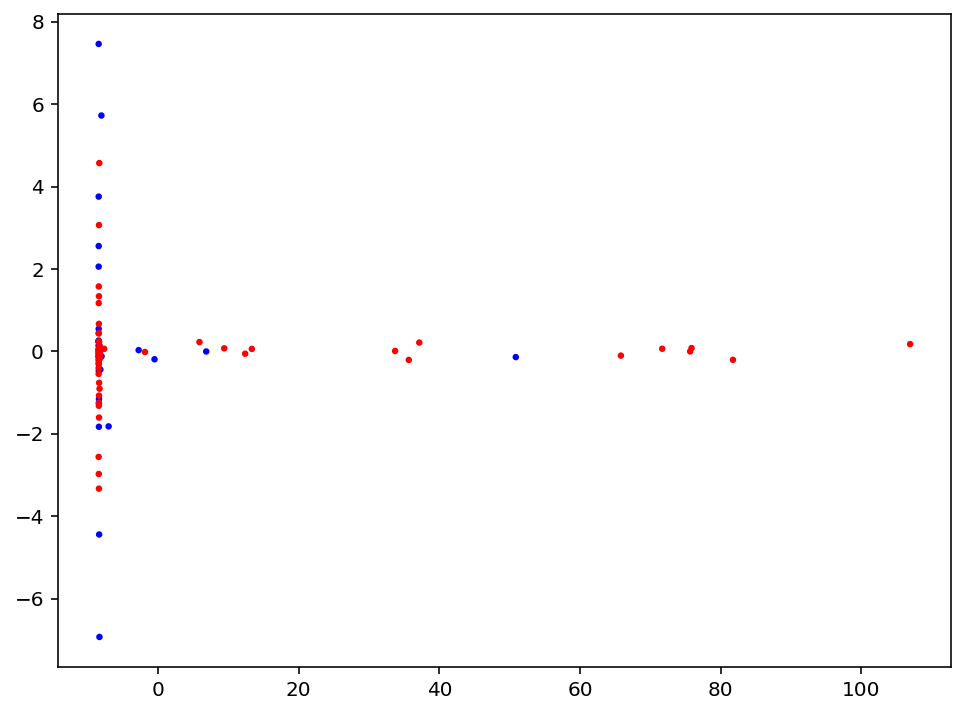

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1], c=y, s=5, cmap='bwr')

In [22]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


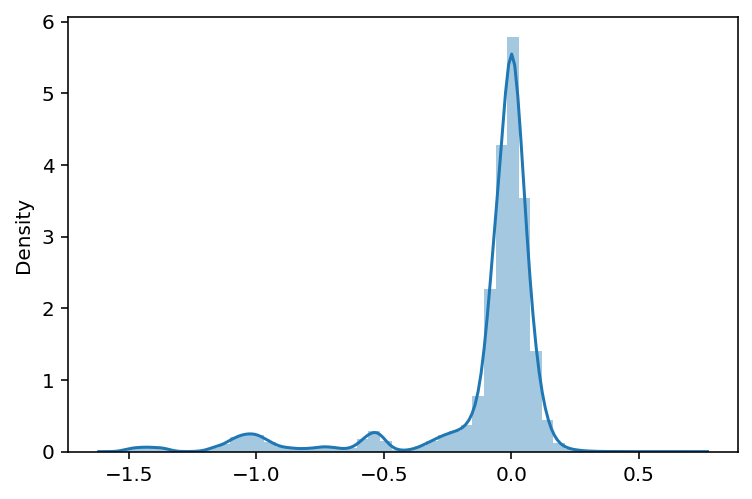

In [23]:
sns.distplot(df1)